# Problem Statement

# Problem 3

A drug is generally administered to a patient in certain patterns or in regular
intervals of time. For example Chemotherapy which is drug treatment in case of Cancer is
generally given to patients in an interval 3-4 weeks, i.e. every 3-4 weeks patients are
administered with the drug.

Similarly to Chemotherapy, “Target Drug” is also administered/prescribed in certain patterns,
we want to analyse in what patterns “Target Drug“ is administered/prescribed to patients,
there might be multiple patterns in which “Target Drug” is administered/prescribed, come up
with an analysis which to extract the dominant patterns in the data using clustering or other
unsupervised techniques.

# Objective

Visualise the prescription patterns with time on X-axis (month) and prescriptions on Y-axis
for each of the patterns you are able to extract(Below is an example of a prescription pattern,
where a prescription is made at least once in the first two months followed by one
prescription for every two months).

# Imported the libraries required for data processing and modelling.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import calendar

# Loaded the specified dataset's data to study its structure and train.

In [5]:
#load the data
train = pd.read_parquet('/content/train.parquet')

# Filter for "Target Drug" incidents only
train_target = train[train['Incident'] == 'TARGET DRUG']

# Create matrix of prescription counts
train_pivot = train_target.pivot_table(index='Patient-Uid', columns=pd.Grouper(key='Date', freq='M'), 
                                 values='Incident', aggfunc='count', fill_value=0)

# Normalize matrix by row
train_norm = train_pivot.div(train_pivot.sum(axis=1), axis=0)

# Cluster patients using KMeans with 6 clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(train_norm)

KMeans(n_clusters=6)

# Data Visualization

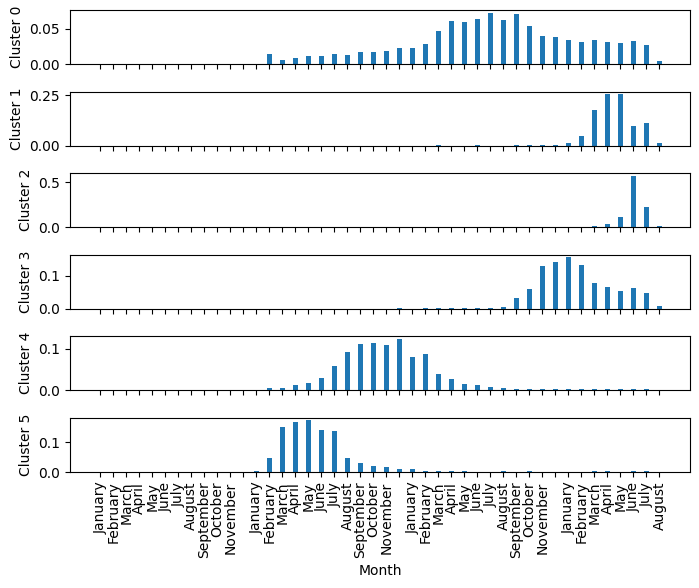

In [6]:
# get cluster centers
cluster_centers = kmeans.cluster_centers_

# create bar plot
fig, ax = plt.subplots(kmeans.n_clusters, 1, figsize=(8, 6), sharex=True)
x = np.arange(len(cluster_centers[0]))
width = 0.35
for i, cluster in enumerate(cluster_centers):
    ax[i].bar(x, cluster, width)
    ax[i].set_ylabel(f'Cluster {i}')
ax[-1].set_xlabel('Month')

# set x-ticks and labels to represent months
month_labels = [calendar.month_name[(i+1) % 12] for i in range(len(x))]
ax[-1].set_xticks(x)
ax[-1].set_xticklabels(month_labels,rotation=90)

# add some space for y-ticks
plt.subplots_adjust(hspace=0.5)